In [19]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [20]:
y   = load('../../March2021/Observation_models/ObsY.joblib')
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
histEns = load ('WFD_historical_ensembleMean_Best5.joblib')

In [21]:
def getSeasonalCycle( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=dArray.groupby('time.dayofyear').mean()
    
    
    
    return fg

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.08322115


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


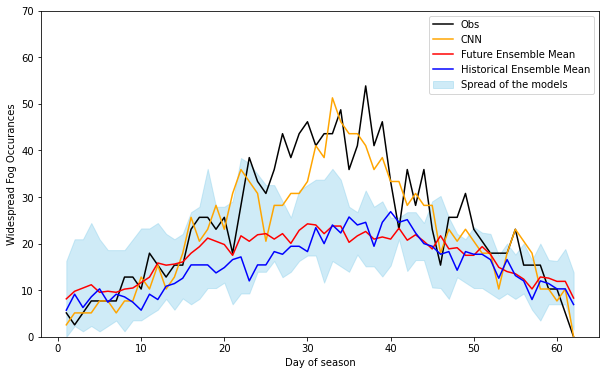

8.139535
9.775649
10.467853
11.170999
9.543091
9.778385
9.545829
10.235294
10.473325
11.636116
12.801641
15.84405
15.37346
15.603283
16.065662
17.93981
19.329687
21.187416
20.49795
19.805746
17.477428
21.67168
20.503422
21.901503
22.136799
20.971272
22.142271
20.049248
22.850891
24.243502
24.002735
22.134062
23.764706
23.767443
20.281807
21.668947
22.60739
20.9658
21.425446
20.9658
23.310534
20.730507
21.89877
20.503422
18.861834
21.682627
18.878248
19.119015
17.485636
17.49658
19.35431
17.715458
14.922026
14.000002
13.529411
12.372093
10.270863
12.837211
12.596443
11.893298
11.904242
8.322115


In [22]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
y.values=y.where(y>=0.46,0)
y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN>=0.46,0)
CNN.values=CNN.where(CNN==0.0,1)

OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]


CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']


for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp126/Modelplots_future/'+cL+'_ssp126.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2100-12-31'))
    fL1.values=fL1.where(fL1>=0.46,0)
    fL1.values=fL1.where(fL1==0.0,1)
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    MTs.append(ts)
MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.plot(x,OTs*100.0,label='Obs', color='black')
plt.plot(x,CNNTs*100.0,label='CNN', color='orange')

plt.fill_between(x, maxMS*100.0,minMS*100.0,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)

plt.plot(x,meanMS*100.0,label='Future Ensemble Mean', color='red')
plt.plot(x,histEns*100.0,label='Historical Ensemble Mean', color='blue')

plt.ylim([0, 70])
    
plt.xlabel('Day of season')
plt.ylabel('Widespread Fog Occurances')     
plt.legend()    
plt.savefig('WFD_SC_126_2015-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend() 

print('\n'.join(map(str, meanMS*100.0)))

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

MPI-ESM1-2-LR
EC-Earth3
0.08322115

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rend

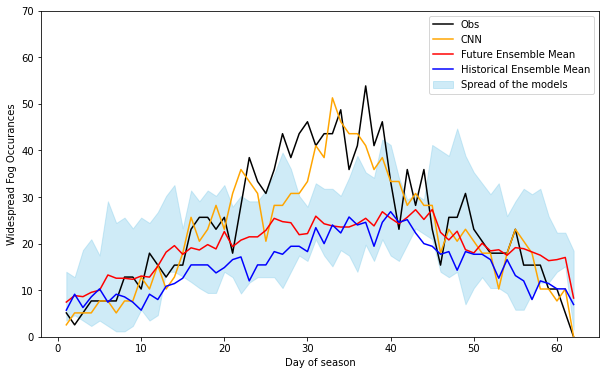

7.450069
8.848153
8.61286
9.540356
10.008207
13.269493
12.574556
12.566347
12.33926
13.039673
12.809851
15.1436405
18.172369
19.567717
17.704514
19.097128
18.634745
19.789331
18.859097
22.59918
19.34063
20.746922
21.458275
21.444597
22.859097
25.42271
24.716825
24.487003
21.91792
22.153215
25.890558
24.259918
23.794802
23.556772
23.567715
24.276333
25.430918
23.800274
26.84268
25.444597
24.265392
25.649796
27.280437
25.184679
27.305061
22.418606
20.787962
22.662107
18.694937
17.989056
20.076605
18.44323
18.681257
17.502052
19.135431
18.911081
18.21067
17.515732
16.33926
16.563612
17.028728
8.322115


In [23]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
y.values=y.where(y>=0.46,0)
y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN>=0.46,0)
CNN.values=CNN.where(CNN==0.0,1)

OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]


CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']


for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp245/Modelplots_future/'+cL+'_ssp245.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2100-12-31'))
    fL1.values=fL1.where(fL1>=0.46,0)
    fL1.values=fL1.where(fL1==0.0,1)
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    MTs.append(ts)
MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.plot(x,OTs*100.0,label='Obs', color='black')
plt.plot(x,CNNTs*100.0,label='CNN', color='orange')

plt.fill_between(x, maxMS*100.0,minMS*100.0,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)

plt.plot(x,meanMS*100.0,label='Future Ensemble Mean', color='red')
plt.plot(x,histEns*100.0,label='Historical Ensemble Mean', color='blue')

plt.ylim([0, 70])
    
plt.xlabel('Day of season')
plt.ylabel('Widespread Fog Occurances')     
plt.legend()    
plt.savefig('WFD_SC_245_2015-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend() 

print('\n'.join(map(str, meanMS*100.0)))

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

MPI-ESM1-2-LR


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rend

EC-Earth3
0.1141392


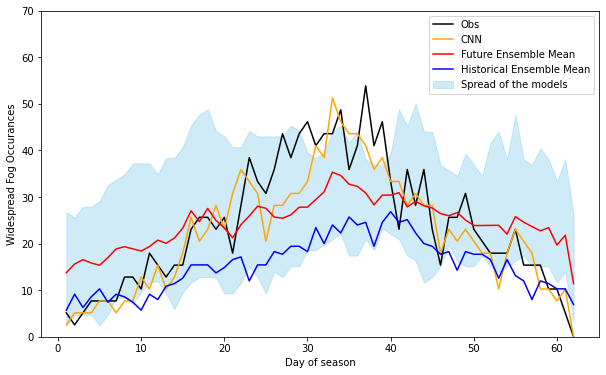

13.748616
15.609081
16.555925
15.836103
15.359911
16.998892
18.875969
19.341084
18.870432
18.41639
19.363234
20.753046
20.060905
21.190475
23.300108
27.048725
24.723145
27.541527
24.977852
23.36102
21.25692
24.064232
25.924698
28.023254
27.585823
25.697676
25.45958
26.157253
27.812845
27.82392
29.4629
31.096346
35.321148
34.612404
32.751934
32.29789
30.874863
28.311188
30.404207
30.415281
30.924696
27.884829
29.069767
28.111849
27.646736
26.450724
25.980068
26.672203
25.066444
23.892582
23.881504
23.914728
23.925802
22.037653
25.802881
24.595793
23.66002
22.7464
23.433
19.689922
21.805092
11.413919


In [24]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
y.values=y.where(y>=0.46,0)
y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN>=0.46,0)
CNN.values=CNN.where(CNN==0.0,1)

OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]


CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']


for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp370/Modelplots_future/'+cL+'_ssp370.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2100-12-31'))
    fL1.values=fL1.where(fL1>=0.46,0)
    fL1.values=fL1.where(fL1==0.0,1)
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    MTs.append(ts)
MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.plot(x,OTs*100.0,label='Obs', color='black')
plt.plot(x,CNNTs*100.0,label='CNN', color='orange')

plt.fill_between(x, maxMS*100.0,minMS*100.0,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)

plt.plot(x,meanMS*100.0,label='Future Ensemble Mean', color='red')
plt.plot(x,histEns*100.0,label='Historical Ensemble Mean', color='blue')

plt.ylim([0, 70])
    
plt.xlabel('Day of season')
plt.ylabel('Widespread Fog Occurances')     
plt.legend()    
plt.savefig('WFD_SC_370_2015-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend() 

print('\n'.join(map(str, meanMS*100.0)))

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

MPI-ESM1-2-LR
EC-Earth3
0.06158654


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rend

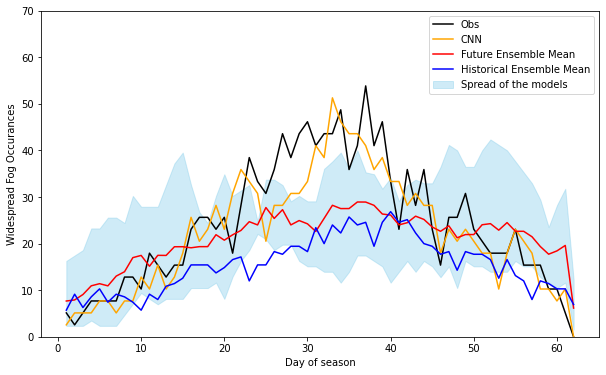

7.67989
7.912449
9.075239
10.941176
11.400821
10.935704
13.028728
13.964431
16.99316
17.463749
15.146375
17.4829
17.463749
19.32695
19.33242
19.105335
19.346102
19.351574
21.912449
20.73598
21.890562
22.829
24.703148
24.010944
27.74282
25.406296
27.283175
24.013681
24.949387
24.246239
22.610123
25.411766
28.227085
27.518469
27.523941
28.930235
28.919285
28.21614
26.352942
26.125854
24.019154
24.487003
25.890562
25.192886
23.56498
22.642956
23.81669
21.255816
21.945282
21.945278
24.046513
24.284542
22.886457
24.511627
22.64569
22.640219
21.471956
19.370726
17.729137
18.437757
19.608757
6.158654


In [25]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
y.values=y.where(y>=0.46,0)
y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN>=0.46,0)
CNN.values=CNN.where(CNN==0.0,1)

OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]


CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']


for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp585/Modelplots_future/'+cL+'_ssp585.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2100-12-31'))
    fL1.values=fL1.where(fL1>=0.46,0)
    fL1.values=fL1.where(fL1==0.0,1)
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    MTs.append(ts)
MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.plot(x,OTs*100.0,label='Obs', color='black')
plt.plot(x,CNNTs*100.0,label='CNN', color='orange')

plt.fill_between(x, maxMS*100.0,minMS*100.0,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)

plt.plot(x,meanMS*100.0,label='Future Ensemble Mean', color='red')
plt.plot(x,histEns*100.0,label='Historical Ensemble Mean', color='blue')

plt.ylim([0, 70])
    
plt.xlabel('Day of season')
plt.ylabel('Widespread Fog Occurances')     
plt.legend()    
plt.savefig('WFD_SC_585_2015-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend() 
print('\n'.join(map(str, meanMS*100.0)))
